**Даны значения зарплат из выборки выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150. Посчитать (желательно без использования статистических методов наподобие std, var, mean) среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.**

In [4]:
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt

def mean_(list_) -> float:
    sum_ = 0
    for i in list_:
        sum_ += i
    return sum_/len(list_)

def dispers_(list_, ddof=False) -> float: # если ddof true - то дисперсия несмещенная, по умолчанию - смещенная
    otklon = 0
    ddof = 1 if ddof else 0
    for i in list_:
        otklon += (i - mean_(list_)) ** 2
    return otklon /(len(list_) - ddof)

def sigma_(list_):
    return dispers_(list_, ddof=False) ** 0.5


In [5]:
zp = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]

stats ={'Среднее арифметическое':  mean_(zp), 
        'Смещенная дисперсия':dispers_(zp), 
        'Несмещенная дисперсия': dispers_(zp, True), 
        'Cреднее квадратичное отклонение': sigma_(zp)}


df = pd.DataFrame(stats, index = ['Значение']).T

df

,Значение
Среднее арифметическое,65.300000
Смещенная дисперсия,950.110000
Несмещенная дисперсия,1000.115789
Cреднее квадратичное отклонение,30.823854


{'whiskers': [<matplotlib.lines.Line2D at 0x1a4338e5e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1a433925b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a433921a88>],
 'medians': [<matplotlib.lines.Line2D at 0x1a43392ab08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a433930b08>],
 'means': []}

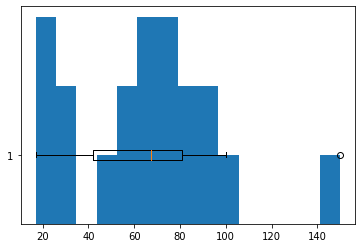

In [14]:
plt.hist(zp, bins=15)
plt.boxplot(zp, vert=False)

In [13]:
df_1 = pd.DataFrame(zp).describe()
df_1

,0
count,20.000000
mean,65.300000
std,31.624607
min,17.000000
25%,42.000000
50%,67.500000
75%,81.000000
max,150.000000


**В первом ящике находится 8 мячей, из которых 5 - белые. Во втором ящике - 12 мячей, из которых 5 белых. Из первого ящика вытаскивают случайным образом два мяча, из второго - 4. Какова вероятность того, что 3 мяча белые?**

из первого два белых из второго  1 белый 3 черных
(5/8 * 4/7) * (5/12) * (7/12 * 6/11 * 5/10)

из первого 1 белый 1 черный из второго 2 белых 2 черных
(5/8 * 3/8) * (5/12 * 4/11) * (7/10 * 6/9)
из первого ноль белых 2 черных, из второго 3 белых 1 черный
(3/8 * 2/7) * (7/12 * 6/11 * 5/10) * (5/12)

In [24]:
from math import factorial, exp

def combinations(k, n) -> int:
    return int(factorial(n) / (factorial(k) * factorial(n-k)))



a = 5/8*4/7*(5/12*7/11*6/10*5/9)

b = (5/8 * 3/7) * (5/12 * 4/11) * (7/10 * 6/9)

c = (3/8 * 2/7) * (7/12 * 6/11 * 5/10) * (5/9)

a+b+c


0.05997474747474748

In [44]:
a = combinations(2, 5)/combinations(2, 8) * (combinations(1,5)*combinations(3,7))/combinations(4, 12)

In [45]:
b = combinations(1, 5)*combinations(1, 3)/combinations(2, 8) * combinations(2,5)*combinations(2,7)/combinations(4, 12)

In [46]:
c = combinations(2, 3)/combinations(2, 8) * combinations(3,5)*combinations(1,7)/combinations(4, 12)

In [50]:
a+b+c


0.3686868686868686

На соревновании по биатлону один из трех спортсменов стреляет и попадает в мишень. Вероятность попадания для первого спортсмена равна 0.9, для второго — 0.8, для третьего — 0.6. Найти вероятность того, что выстрел произведен: a). первым спортсменом б). вторым спортсменом в). третьим спортсменом.

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a). на факультете A б). на факультете B в). на факультете C?

Устройство состоит из трех деталей. Для первой детали вероятность выйти из строя в первый месяц равна 0.1, для второй - 0.2, для третьей - 0.25. Какова вероятность того, что в первый месяц выйдут из строя: а). все детали б). только две детали в). хотя бы одна деталь г). от одной до двух деталей?